In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy as sci

#Creates function to remove extra spaces in sim file
def cleanlines(line):
    remove = ['  ', ' ']
    for r in remove:
        clean = line.replace(r, '') 
    split = clean.split(';')
    return split

In [2]:
#Opens sim file
data = open('direct.inc1.id1.sim', 'r').read()
lines = data.split('\n')

In [3]:
#Creates empty array for y and z value of hits
darrell_arr = np.dtype({"names": ['y_value','z_value'], "formats": [np.float32, np.float32]})
ylist = []
zlist = []
c = 0
#Tallies total hit count and fills coordinates of hits from sim file
for l in lines:
    line  = cleanlines(l)
    if len(line) > 1 and line[0][2:6] == 'BLAK':
        c +=1
        ylist.append(np.float32(line[5]))
        zlist.append(np.float32(line[6]))
print(c)
        
useful_arr = np.zeros(len(ylist), darrell_arr)
useful_arr['y_value'] = ylist
useful_arr['z_value'] = zlist
useful_arr[:10]

11277


array([(-317.27548218,  11.71667004), (-335.65081787, -11.23281956),
       (-333.26107788,   9.76562023), (-347.3182373 , -27.60333061),
       (-318.13793945,  -5.27129984), (-342.02508545,  29.52573013),
       (-310.79464722,  26.74770927), (-309.46484375,  -0.03825   ),
       (-338.68551636,  -8.84154987), (-356.5848999 ,  21.73534966)],
      dtype=[('y_value', '<f4'), ('z_value', '<f4')])

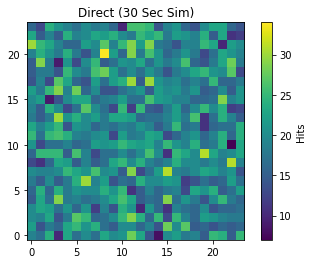

In [5]:
heatmap, xedges, yedges = np.histogram2d(useful_arr['y_value'], useful_arr['z_value'], bins=[24, 24])

plt.clf()
plt.imshow(heatmap.T, origin='lower')
cb = plt.colorbar()
cb.set_label('Hits')
plt.title('Direct (30 Sec Sim)')
plt.savefig('Direct_30sec.png')
plt.show()


In [21]:
import sphviewer as sph

def myplot(x, y, nb=32, xsize=24, ysize=24):   
    xmin = np.min(x)
    xmax = np.max(x)
    ymin = np.min(y)
    ymax = np.max(y)

    x0 = (xmin+xmax)/2.
    y0 = (ymin+ymax)/2.

    pos = np.zeros([3, len(x)])
    pos[0,:] = x
    pos[1,:] = y
    w = np.ones(len(x))

    P = sph.Particles(pos, w, nb=nb)
    S = sph.Scene(P)
    S.update_camera(r='infinity', x=x0, y=y0, z=0, 
                    xsize=xsize, ysize=ysize)
    R = sph.Render(S)
    R.set_logscale()
    img = R.get_image()
    extent = R.get_extent()
    for i, j in zip(xrange(4), [x0,x0,y0,y0]):
        extent[i] += j
    print extent
    return img, extent

fig = plt.figure(1, figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


# Generate some test data
x = ylist
y = zlist

#Plotting a regular scatter plot
ax1.plot(x,y,'k.', markersize=5)
ax1.set_xlim(-3,3)
ax1.set_ylim(-3,3)

heatmap_16, extent_16 = myplot(x,y, nb=16)
heatmap_32, extent_32 = myplot(x,y, nb=32)
heatmap_64, extent_64 = myplot(x,y, nb=64)

ax2.imshow(heatmap_16, extent=extent_16, origin='lower', aspect='auto')
ax2.set_title("Smoothing over 16 neighbors")

ax3.imshow(heatmap_32, extent=extent_32, origin='lower', aspect='auto')
ax3.set_title("Smoothing over 32 neighbors")

#Make the heatmap using a smoothing over 64 neighbors
ax4.imshow(heatmap_64, extent=extent_64, origin='lower', aspect='auto')
ax4.set_title("Smoothing over 64 neighbors")

plt.show()


SyntaxError: Missing parentheses in call to 'print' (<ipython-input-21-73f64b363117>, line 27)